In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import skew, f_oneway, pearsonr, ttest_rel, chi2_contingency, shapiro, spearmanr

### Import raw data

In [2]:
url = r"C:\Users\Admin\Downloads\Marathon data.xlsx"
d_2023 = pd.read_excel(url, sheet_name = "2023")
d_2024 = pd.read_excel(url, sheet_name = "2024")

In [6]:
print("data of 2023: ",d_2023.shape)
print("data of 2024: ",d_2024.shape)

data of 2023:  (73, 8)
data of 2024:  (76, 8)


### Sample of raw data

In [9]:
d_2023.head()

,Place,First_Name,Last_Name,City,State,Age,Gender,Time
0,1,Mike,Alberts,Melbourne,FL,34,M,18:33:06
1,2,Matt,Clapper,NaN,USA,41,M,19:21:53
2,3,Sarah,Raaymakers,Odessa,FL,39,F,20:43:19
3,4,Nikki,Criscuolo,South Pasadena,FL,24,F,21:02:52
4,5,Nels,Matson,Bradenton,FL,41,M,21:21:08


In [11]:
d_2024.head()

,Place,First_Name,Last_Name,City,State,Age,Gender,Time
0,1,Lucas,Vidal,Cape Coral,FL,38,M,19:43:00
1,2,Brandon,Westover,Orlando,FL,45,M,21:15:00
2,3,Lucas,Hathaway,Atlanta,GA,34,M,23:31:36
3,4,Sage,Lyons,Sarasota,FL,27,F,23:37:05
4,5,Colin,Gotham,Land O Lakes,FL,30,M,"1 day, 0:43:02"


### Data Cleanup

In [14]:
d_2023["Full_Name"] = d_2023["First_Name"] + " " + d_2023["Last_Name"]

In [16]:
d_2024["Full_Name"] = d_2024["First_Name"] +" " + d_2024["Last_Name"]

In [18]:
d_2023 = d_2023.drop(["First_Name","Last_Name"], axis = 1)

In [20]:
d_2024 = d_2024.drop(["First_Name","Last_Name"], axis = 1)

### Data Convert into 4 part


In [23]:
Finishers_2023 = d_2023[d_2023["Time"] != "Did Not Finish"].copy()

In [25]:
Finishers_2024 = d_2024[d_2024["Time"] != "Did Not Finish"].copy()

In [27]:
dnf_2023 = d_2023[d_2023["Time"] == "Did Not Finish"].copy()

In [29]:
dnf_2024 = d_2024[d_2024["Time"] == "Did Not Finish"].copy()

### Drop Features for Did Not Finish

In [32]:
dnf_2023.drop(["Place","Time"], axis = 1, inplace = True)

In [34]:
dnf_2024.drop(["Place","Time"], axis = 1, inplace = True)

### Convert Time into minutes for Finishers

In [37]:
Finishers_2023["Time"] = Finishers_2023["Time"].astype(str)

In [39]:
Finishers_2024["Time"] = Finishers_2024["Time"].astype(str)

### Convert To Time Delta Finishers

In [42]:
Finishers_2023["Time_Delta"] = pd.to_timedelta(Finishers_2023["Time"], errors = "coerce")

In [44]:
Finishers_2024["Time_Delta"] = pd.to_timedelta(Finishers_2024["Time"], errors = "coerce")

### Convert To Minutes Finishers

In [47]:
Finishers_2023["Race_Min"] = Finishers_2023["Time_Delta"].dt.total_seconds()/60

In [49]:
Finishers_2024["Race_Min"] = Finishers_2024["Time_Delta"].dt.total_seconds()/60

### Drop Time Delta

In [52]:
Finishers_2023.drop(["Time_Delta"], axis = 1, inplace = True)

In [54]:
Finishers_2024.drop(["Time_Delta"],axis = 1, inplace = True)

## Statistics

### Average

In [58]:
print("Average Race Finishing Time of 2023 :", Finishers_2023["Race_Min"].mean())

Average Race Finishing Time of 2023 : 1726.4187499999998


In [60]:
print("Average Race Finishing Time of 2024 :", Finishers_2024["Race_Min"].mean())

Average Race Finishing Time of 2024 : 1809.1434959349592


### Median

In [63]:
Finishers_2023["Race_Min"].median()

1732.7333333333333

In [65]:
Finishers_2024["Race_Min"].median()

1865.0

### STD

In [68]:
Finishers_2023["Race_Min"].std()

272.7764213772832

In [70]:
Finishers_2024["Race_Min"].std()

247.9496065477724

### Finisher Rate

In [78]:
total_2023 = d_2023["Full_Name"].count()

f_2023 = Finishers_2023["Full_Name"].count()

finish_rate_2023 = (f_2023/total_2023)*100
print("Finish Rate of 2023: ",finish_rate_2023)

Finish Rate of 2023:  65.75342465753424


In [80]:
total_2024 = d_2024["Full_Name"].count()

f_2024 = Finishers_2024["Full_Name"].count()

finish_rate_2024 = (f_2024/total_2024)*100
print("Finish Rate of 2024: ",finish_rate_2024)


Finish Rate of 2024:  53.94736842105263


### Top 5 Cities

In [83]:
print("Top 5 State of 2023")
d_2023["State"].value_counts().head()

Top 5 State of 2023


State
FL     59
USA     3
NC      2
AL      2
CA      1
Name: count, dtype: int64

In [85]:
print("Top 5 Cities of 2023")
d_2023["City"].value_counts().head()

Top 5 Cities of 2023


City
Tampa         8
Clearwater    5
Odessa        4
Palmetto      3
Orlando       3
Name: count, dtype: int64

In [87]:
print("Top 5 State of 2024")
d_2024["State"].value_counts().head()

Top 5 State of 2024


State
FL    56
VA     3
GA     2
NC     2
OH     2
Name: count, dtype: int64

In [89]:
print("Top 5 Cities of 2024")
d_2024["City"].value_counts().head()

Top 5 Cities of 2024


City
Tampa             9
Clearwater        3
Ocala             3
Virginia Beach    2
Plant City        2
Name: count, dtype: int64

### Plotting

<Figure size 500x200 with 0 Axes>

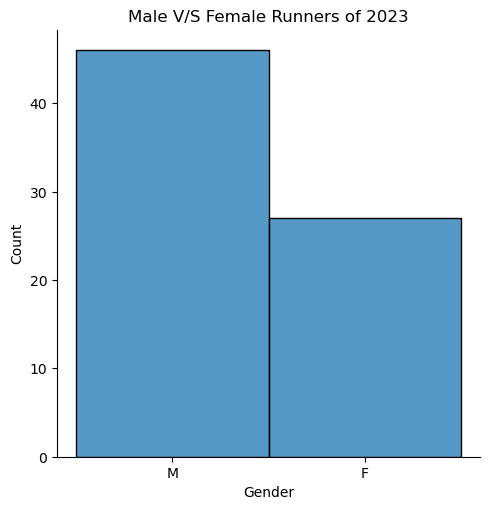

In [92]:
# male v/s female runner of 2023
plt.figure(figsize = (5,2))

sns.displot(data = d_2023, x = "Gender", )
plt.title("Male V/S Female Runners of 2023")
plt.show()

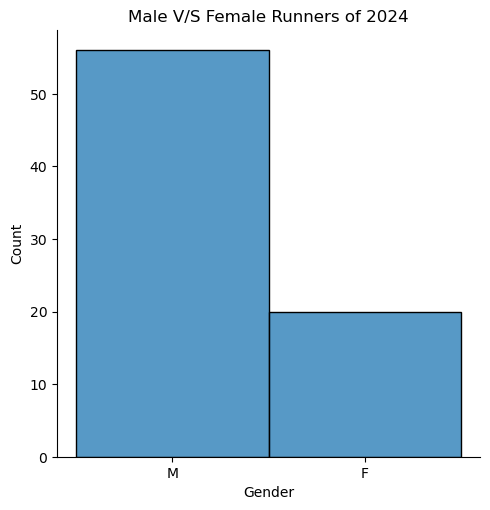

In [94]:
# male v/s female runner of 2024

sns.displot(data = d_2024, x = "Gender")
plt.title("Male V/S Female Runners of 2024")
plt.show()

### Distribution of time

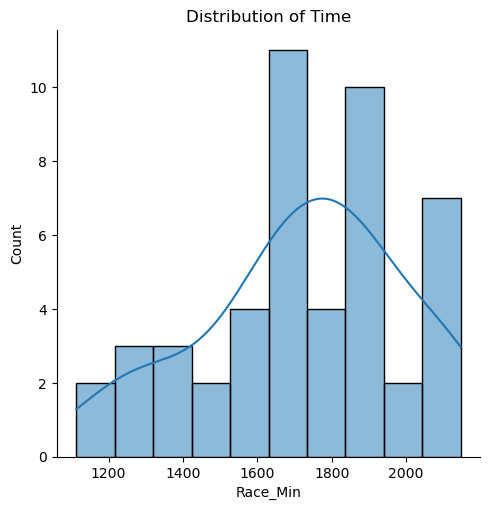

In [97]:
sns.displot(data = Finishers_2023, x = "Race_Min", kde = True, bins = 10)
plt.title("Distribution of Time")
plt.show()

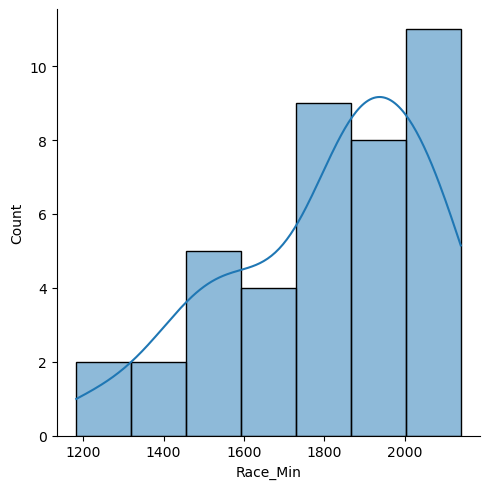

In [99]:
sns.displot(data = Finishers_2024, x = "Race_Min", kde = True)
plt.show()

### Skew

In [102]:
skew_2023 = skew(Finishers_2023["Race_Min"])
skew_2023

-0.40822297476957614

In [104]:
skew_2024 = skew(Finishers_2024["Race_Min"])
skew_2024

-0.7258344180321886

### Gender

In [107]:
male_finishers_2023 = Finishers_2023[Finishers_2023["Gender"] =="M"].copy()
female_finishers_2023 = Finishers_2023[Finishers_2023["Gender"] == "F"].copy()
male_finishers_2024 = Finishers_2024[Finishers_2024["Gender"] == "M"].copy()
female_finishers_2024 = Finishers_2024[Finishers_2024["Gender"] == "F"].copy()

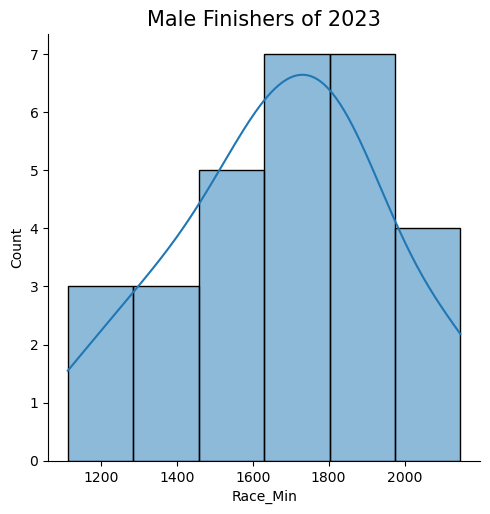

In [109]:
# male Finishers of 2023
sns.displot(male_finishers_2023["Race_Min"], kde = True)
plt.title("Male Finishers of 2023", fontsize = 15)
plt.show()

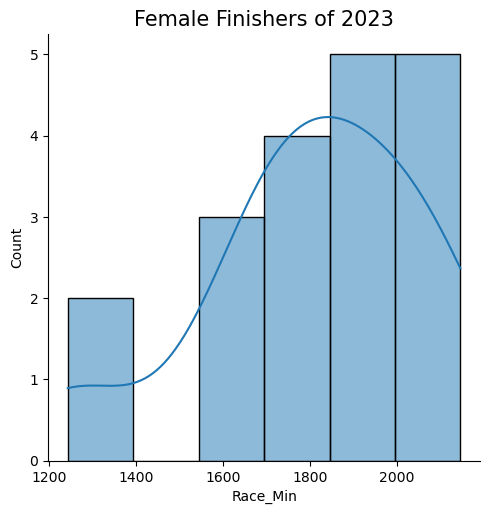

In [111]:
# female finishers of 2023
sns.displot(female_finishers_2023["Race_Min"],kde = True)
plt.title("Female Finishers of 2023", fontsize = 15)
plt.show()

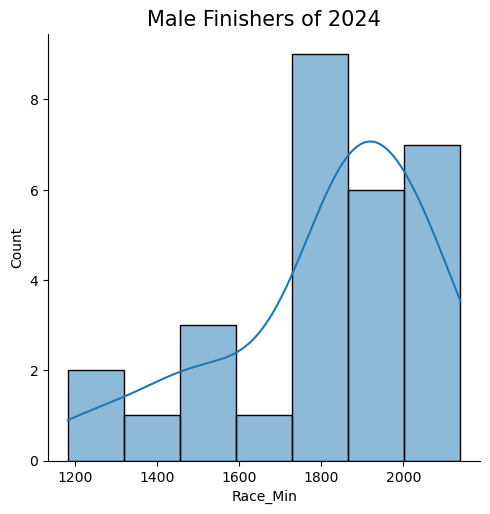

In [113]:
sns.displot(male_finishers_2024["Race_Min"], kde = True)
plt.title("Male Finishers of 2024", fontsize = 15)
plt.show()

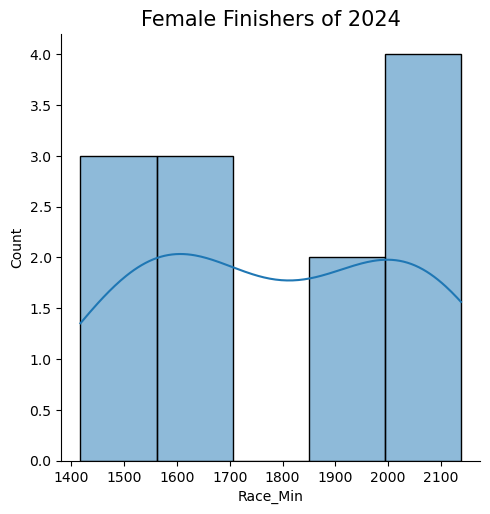

In [115]:
sns.displot(female_finishers_2024["Race_Min"],kde = True)
plt.title("Female Finishers of 2024", fontsize = 15)
plt.show()

### Age

In [118]:
combine_data = pd.DataFrame({
    "Age":pd.concat([
        Finishers_2023["Age"],
        dnf_2023["Age"],
        Finishers_2024["Age"],
        dnf_2024["Age"]]),
    "Category": (
        ["2023 Finishers"] * len(Finishers_2023["Age"])+
        ["2023 Dnf"] * len(dnf_2023["Age"])+
        ["2024 Finishers"] * len(Finishers_2024["Age"])+
        ["2024 Dnf"] * len(dnf_2024["Age"])
    )
        
})

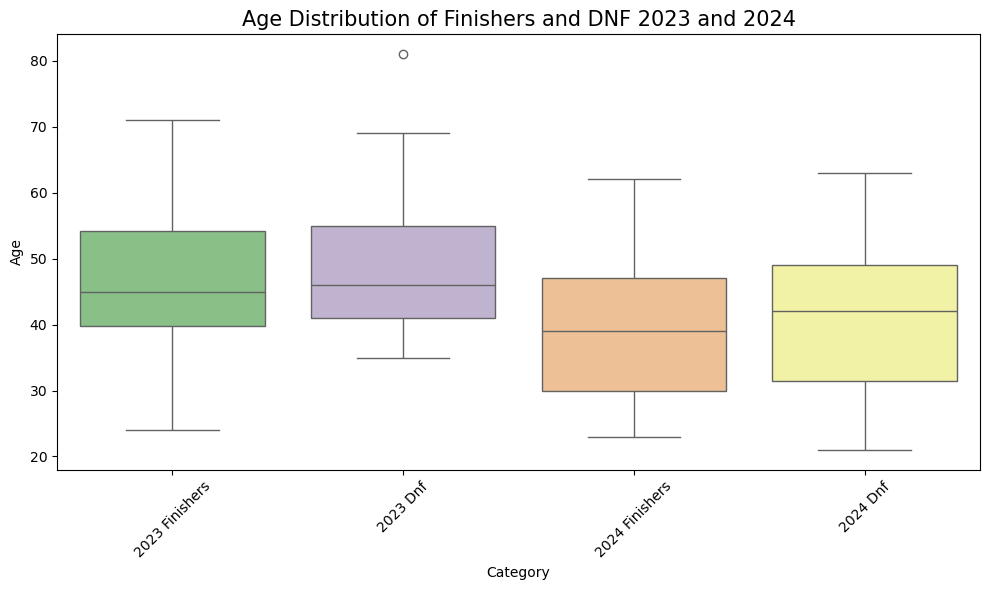

In [148]:
plt.figure(figsize = (10,6))
sns.boxplot(data = combine_data, x = "Category", y = "Age", palette = "Accent", hue = "Category")
plt.title("Age Distribution of Finishers and DNF 2023 and 2024", fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

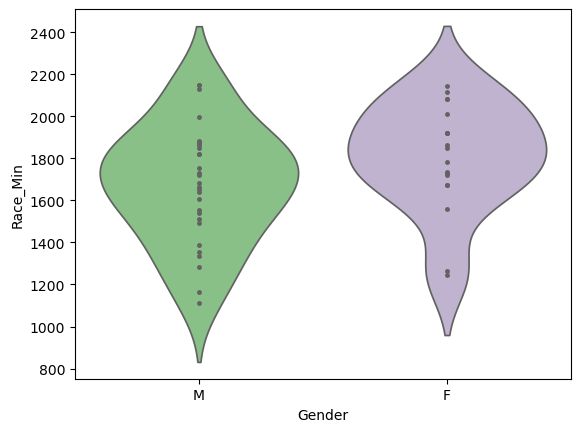

In [162]:
sns.violinplot(data = Finishers_2023, x = "Gender", y = "Race_Min", hue = "Gender",inner = "point", palette = "Accent")
plt.show()

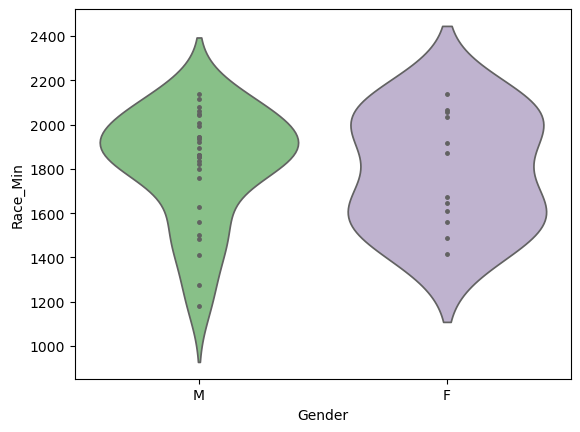

In [166]:
sns.violinplot(data = Finishers_2024, x = "Gender", y = "Race_Min", inner = "point", hue = "Gender", palette = "Accent")
plt.show()

### Correlation Between Age and Time

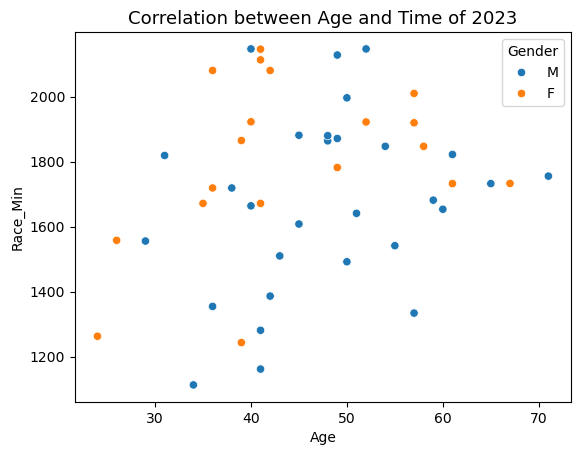

In [178]:
sns.scatterplot(data = Finishers_2023, x = "Age", y = "Race_Min", hue ="Gender" )
plt.title("Correlation between Age and Time of 2023", fontsize = 13)
plt.show()

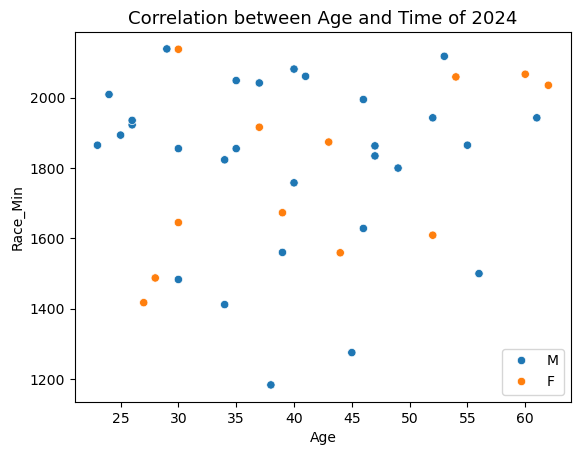

In [188]:
sns.scatterplot(data = Finishers_2024, x = "Age", y = "Race_Min", hue = "Gender")
plt.legend(loc = 4)
plt.title("Correlation between Age and Time of 2024",fontsize = 13)
plt.show()

### Normal distribution of 2023

In [196]:
# shapiro() Test wether your data comes from normal distribution 
# its returns two value 1) Test Statistic = how close the data is normal. 2) P_value = the probablity that the data normally distributed.
_,p_age_2023 = shapiro(Finishers_2023["Age"])

In [200]:
p_age_2023

0.7440999746357332

In [202]:
_,p_race_2023 = shapiro(Finishers_2023["Race_Min"])

In [204]:
p_race_2023

0.11799266916670359

In [214]:
# it measure the liner relationship between the two veriable
# the result tell us how strongly and in what direction the two veriable are related

corr_2023,_ = pearsonr(Finishers_2023["Age"], Finishers_2023["Race_Min"])

In [216]:
corr_2023

0.2365484748083461

In [237]:
s_corr_2023,_ = spearmanr(Finishers_2023["Age"],Finishers_2023["Race_Min"])
print(s_corr_2023)

0.21567946281354386


### Normal distribution of 2024

In [223]:
_,p_age_2024 = shapiro(Finishers_2024["Age"])

In [225]:
p_age_2024

0.14458746535405165

In [227]:
_,p_race_2024 = shapiro(Finishers_2024["Race_Min"])
p_race_2024

0.012151833574466234

In [229]:
corr_2024,_ = pearsonr(Finishers_2024["Age"], Finishers_2024["Race_Min"])
corr_2024

0.10946998405636371

In [239]:
s_corr_2024,_ = spearmanr(Finishers_2024["Age"],Finishers_2024["Race_Min"])
print(s_corr_2024)

0.10327392870461473


### Test Section

In [ ]:
# Two sample z Test
# Compare 2023 and 2024 looking at the time
# 2024 has harder

In [249]:
race_2024_times = Finishers_2024["Race_Min"]

In [251]:
race_2023_times = Finishers_2023["Race_Min"]

In [263]:
alpha = 0.05

In [309]:
z_score, pvalue = ztest(race_2024_times, race_2023_times, alternative = "larger")

In [311]:
print(ztest)

<function ztest at 0x000001739862E660>


In [313]:
print(z_score)

1.486704861264319


In [315]:
print(pvalue)

0.06854638910805894


In [317]:
if pvalue < alpha:
    print(f"Reject the null hypothesis : The finish times difference (P = {pvalue}")
else:
    print(f"Fail to reject the null hypothesis : No significant difference (P = {pvalue}")

Fail to reject the null hypothesis : No significant difference (P = 0.06854638910805894


In [319]:
# Exemple 2
# paired T test competed in 2023 and 2024 

In [332]:
merged_data = pd.merge(Finishers_2023, Finishers_2024 , on = "Full_Name", suffixes = ("_2023", "_2024"))

In [338]:
merged_data

,Place_2023,City_2023,State_2023,Age_2023,Gender_2023,Time_2023,Full_Name,Race_Min_2023,Place_2024,City_2024,State_2024,Age_2024,Gender_2024,Time_2024,Race_Min_2024,Time_diff
0,9,Los angeles,CA,50,M,"1 day, 0:52:00",David Paske,1492.000000,24,Los Angeles,CA,25,M,"1 day, 7:33:47",1893.783333,401.783333
1,11,St Petersburg,FL,55,M,"1 day, 1:41:28",Doug Mayle,1541.466667,7,St. Petersburg,FL,56,M,"1 day, 0:59:46",1499.766667,-41.700000
2,13,Sarasota,FL,26,F,"1 day, 1:57:53",Sage Lyons,1557.883333,4,Sarasota,FL,27,F,23:37:05,1417.083333,-140.800000


In [336]:
merged_data["Time_diff"] = merged_data["Race_Min_2024"] - merged_data["Race_Min_2023"]

In [342]:
_,p_race_time_diff = shapiro(merged_data["Time_diff"])

In [344]:
p_race_time_diff

0.3291542154605184

In [346]:
race_2023 = merged_data["Race_Min_2023"]

In [348]:
race_2024 = merged_data["Race_Min_2024"]

In [353]:
race_2023.mean()

1530.45

In [355]:
race_2024.mean()

1603.5444444444445

In [359]:
t_stat, p_value = ttest_rel(race_2023, race_2024)

In [361]:
t_stat

-0.4381746972960781

In [363]:
p_value

0.7040438895013723

In [369]:
# Desicion Rule


if pvalue < alpha :
    print(f"Reject the null hypothesis: The paired finish times difference (P = {pvalue}")

else:
    print(f"Fail to Reject the null hypothesis: No significant difference (p = {pvalue}") 

Fail to Reject the null hypothesis: No significant difference (p = 0.06854638910805894
